In [ ]:
# Блок 2 Корреляционные зависимости

In [1]:
# Импортируем в проект требуемые библиотеки

# Блок основных библиотек
import pandas as pd # библиотека для обработки и анализа данных
import numpy as np
import seaborn as sns # библиотека для создания статистических графиков
import random #  генераторатор случайных чисел и данных
import os # библиотека функций для работы с операционной системой.
import math

# Блок модулей и библиотек для построения графиков
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import plotly
from plotly.subplots import make_subplots
from scipy.interpolate import make_interp_spline
from scipy.interpolate import interp1d
%matplotlib inline
sns.set_style('darkgrid')

# Блок библиотек и модулей для статистического и корреляционного анализа
from sklearn.preprocessing import MinMaxScaler
import scipy
from scipy import stats 
from scipy.stats import mstats
import ydata_profiling  # Модуль статистического отчета. Форма pandas_profiling!!!! отменяется c 1-го апреля 2023 г
from ydata_profiling import ProfileReport

# Блок исключеия вывода предупреждающих ошибок
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [2]:
# Блок импорта созданых функций для проекта из папки modules_def
%run ./modules_def/optimize_memory_usage.ipynb # функция оптимизации размера df
%run ./modules_def/drawing_graphs.ipynb        # функция рисования разных графиков 
%run ./modules_def/sns_plt_PairGrid.ipynb      # функция рисования матрицы графиков
%run ./modules_def/plot_corr_heatmap.ipynb     # функция рисования корреляционной матрицы

In [3]:
data_main_clean = pd.read_csv(r'data_storage\data_block1_clean\data_main_clean.csv')

In [4]:
data_main_clean

pattern_angle  step_strip  density_strip  ratio_filler_matrix    density  \
0                0    7.856166      64.301960             2.587348  1953.2749   
1                0    6.675780      78.623300             2.046471  2037.6318   
2                0    7.526398      38.176975             1.856476  2018.2203   
3                0    8.325699      46.045430             3.305535  1917.9075   
4                0    7.656211      33.571022             2.709554  1892.0712   
..             ...         ...            ...                  ...        ...   
930              1    8.088111      47.759180             2.271346  1952.0879   
931              1    7.619138      66.931930             3.444022  2050.0890   
932              1    9.800925      72.858284             3.280604  1972.3729   
933              1   10.079859      65.519480             3.705351  2066.7998   
934              1    9.021043      66.920140             3.808020  1890.4135   

     elasticity_module  number_hardeners  content_epoxy_groups  \
0           1136.59620         137.62743             22.344534   
1            707.57086         101.61725             23.146393   
2            836.29440         135.40170             26.435514   
3            478.28625         105.78693             17.874100   
4            641.05255          96.56329             22.989290   
..                 ...               ...                   ...   
930          912.85550          86.99218             20.123250   
931          444.73264         145.98198             19.599770   
932          416.83652         110.53348             23.957502   
933          741.47550         141.39796             19.246944   
934          417.31622         129.18341             27.474764   

     flash_temperature  surface_density  elasticity_module_stretching  \
0            234.71689        555.89343                     80.803220   
1            312.30722        547.60120                     73.817070   
2            327.51038        150.96144                     77.210760   
3            328.15457        526.69214                     72.345710   
4            262.95673        804.59260                     74.511360   
..                 ...              ...                           ...   
930          324.77457        209.19870                     73.090960   
931          254.21541        350.66083                     72.920830   
932          248.42305        740.14276                     74.734344   
933          275.77985        641.46814                     74.042710   
934          300.95270        758.74786                     74.309710   

     strapery_strength  resin_consumption  
0            2587.3430         246.613110  
1            2624.0264         178.198560  
2            2473.1873         123.344560  
3            3059.0330         275.575870  
4            2288.9673         126.816340  
..                 ...                ...  
930          2387.2925         125.007670  
931          2360.3928         117.730095  
932          2662.9060         236.606770  
933          2071.7158         197.126070  
934          2856.3289         194.754350  

[935 rows x 13 columns]

In [4]:
data_main_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   pattern_angle                 935 non-null    int64  
 1   step_strip                    935 non-null    float64
 2   density_strip                 935 non-null    float64
 3   ratio_filler_matrix           935 non-null    float64
 4   density                       935 non-null    float64
 5   elasticity_module             935 non-null    float64
 6   number_hardeners              935 non-null    float64
 7   content_epoxy_groups          935 non-null    float64
 8   flash_temperature             935 non-null    float64
 9   surface_density               935 non-null    float64
 10  elasticity_module_stretching  935 non-null    float64
 11  strapery_strength             935 non-null    float64
 12  resin_consumption             935 non-null    float64
dtypes: fl

In [5]:
# Вызываем функцию optimize_memory_usage из директории modules_def
# для уменьшения размерности переменных в файле data_main и облегчения расчетов  

data_main_clean = optimize_memory_usage(data_main_clean, print_size=True, print_info_befor=False, print_info_after=True)

Memory usage size: before 0.0929 Mb - after 0.0465 Mb (49.9%).
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   pattern_angle                 935 non-null    int32  
 1   step_strip                    935 non-null    float32
 2   density_strip                 935 non-null    float32
 3   ratio_filler_matrix           935 non-null    float32
 4   density                       935 non-null    float32
 5   elasticity_module             935 non-null    float32
 6   number_hardeners              935 non-null    float32
 7   content_epoxy_groups          935 non-null    float32
 8   flash_temperature             935 non-null    float32
 9   surface_density               935 non-null    float32
 10  elasticity_module_stretching  935 non-

In [7]:
data_main_clean.apply(lambda x: x.nunique())

pattern_angle                     2
step_strip                      935
density_strip                   935
ratio_filler_matrix             935
density                         935
elasticity_module               935
number_hardeners                935
content_epoxy_groups            935
flash_temperature               934
surface_density                 935
elasticity_module_stretching    935
strapery_strength               935
resin_consumption               935
dtype: int64

In [ ]:
# Инициализируем  ProfileReport() для анализа нашего сформированнного df - data_main
profile_clean_outliers = ProfileReport(data_main_clean,  title = 'Profiling Report Composites Clean Outliers')

# Запускаем модуль
profile_clean_outliers

In [10]:
# Сохраним полученый profile 
profile_clean_outliers.to_file(r'profile_report\profile_report_composites_clean_outliers.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
Продолжаем работу над исследованием нашего df - data_main_clean

## Начало блока исследования коэффициентов корреляции_________________________________________________________

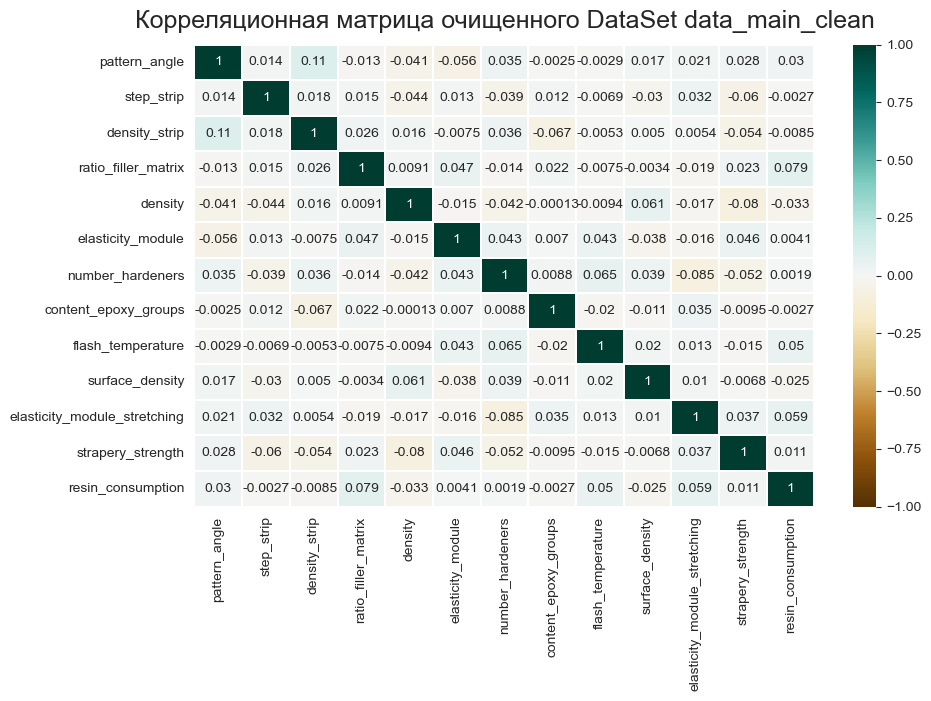

In [71]:
# Построим корреляционную матрицу data_main_clean с помощью функции plot_corr_heatmap
plot_corr_heatmap(data_main_clean, 10,  6, 
                  'Корреляционная матрица очищенного DataSet data_main_clean', 
                  r'save_fig\fig_block2_corr\corr_heatmap_data_main_clean.png'
                  )

In [7]:
# Максимальные корреляции в нащем df для полного объема строк 
print(data_main_clean.corr().abs().apply(lambda x: sorted(x)[-2]))

pattern_angle                   0.107487
step_strip                      0.060461
density_strip                   0.107487
ratio_filler_matrix             0.078895
density                         0.080297
elasticity_module               0.056466
number_hardeners                0.084787
content_epoxy_groups            0.066516
flash_temperature               0.065471
surface_density                 0.060695
elasticity_module_stretching    0.084787
strapery_strength               0.080297
resin_consumption               0.078895
dtype: float64


In [8]:
# Максимальные корреляции в нащем df для первых 100 строк 
print(data_main_clean.head(100).corr().abs().apply(lambda x: sorted(x)[-2]))

pattern_angle                        NaN
step_strip                      0.181442
density_strip                   0.171892
ratio_filler_matrix             0.293409
density                         0.170690
elasticity_module               0.365598
number_hardeners                0.365598
content_epoxy_groups            0.157392
flash_temperature               0.158004
surface_density                 0.276080
elasticity_module_stretching    0.161475
strapery_strength               0.276080
resin_consumption               0.293409
dtype: float64


## Максимальные коэффициенты корреляции увеличились. 
## Исследуем влияние количества строк в выборке  на максимальные коэффициенты кореляции

In [13]:
# Создадим пустой DF для максимумов коэффициентов корреляции для разных значений количества  строк выборки значений от 100 до len(data_main_clean)
df_corr_value = pd.DataFrame(columns= [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650,  700, 750, 800, 850, 900, len(data_main_clean)],
                             index = list(data_main_clean)
                            )

In [15]:
df_corr_value.head(13)

100  150  200  250  300  350  400  450  500  \
pattern_angle                 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
step_strip                    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
density_strip                 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
ratio_filler_matrix           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
density                       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
elasticity_module             NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
number_hardeners              NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
content_epoxy_groups          NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
flash_temperature             NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
surface_density               NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
elasticity_module_stretching  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
strapery_strength             NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
resin_consumption             NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

                              550  600  650  700  750  800  850  900  935  
pattern_angle                 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
step_strip                    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
density_strip                 NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
ratio_filler_matrix           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
density                       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
elasticity_module             NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
number_hardeners              NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
content_epoxy_groups          NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
flash_temperature             NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
surface_density               NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
elasticity_module_stretching  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
strapery_strength             NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
resin_consumption             NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN

In [14]:
# Взято df.head(column).corr().abs().apply(lambda x: sorted(x)[-2]) 
# из https://stackoverflow.com/questions/29294983/how-to-calculate-correlation-between-all-columns-and-remove-highly-correlated-on

# Функция value_corr_show заполняет массив df_corr_value максимальными значениями для коэффициентов корреляции по каждому параметру
# при разных значениях N -числа СЛУЧАЙНЫХ выборок из нашего DataFrame от 100 до 935
# df - наш основной исследуемый DF
# df_corr_value - df для максимальных значений коэффициентов корреляции 
# при разных значениях N - количества СЛУЧАЙНЫХ  выбраных значений из DF

def value_corr_show(df, df_corr_value):
    for column in df_corr_value.columns:
        df_corr_value[column] = df.head(column).corr().abs().apply(lambda x: sorted(x)[-2]).round(3)
    return(df_corr_value)

In [15]:
value_corr_show(data_main_clean, df_corr_value)

100    150    200    250    300    350    400  \
pattern_angle                   NaN    NaN    NaN    NaN    NaN    NaN    NaN   
step_strip                    0.181  0.170  0.124  0.124  0.142  0.148  0.118   
density_strip                 0.172  0.170  0.115  0.100  0.103  0.093  0.087   
ratio_filler_matrix           0.293  0.278  0.184  0.152  0.137  0.116  0.121   
density                       0.171  0.118  0.152  0.175  0.175  0.171  0.146   
elasticity_module             0.366  0.215  0.171  0.129  0.092  0.077  0.093   
number_hardeners              0.366  0.215  0.171  0.173  0.151  0.129  0.107   
content_epoxy_groups          0.157  0.088  0.078  0.116  0.103  0.104  0.082   
flash_temperature             0.158  0.142  0.124  0.081  0.092  0.080  0.107   
surface_density               0.276  0.243  0.207  0.175  0.175  0.171  0.146   
elasticity_module_stretching  0.161  0.135  0.141  0.105  0.072  0.098  0.090   
strapery_strength             0.276  0.243  0.207  0.173  0.151  0.148  0.119   
resin_consumption             0.293  0.278  0.184  0.152  0.125  0.129  0.132   

                                450    500    550    600    650    700    750  \
pattern_angle                   NaN  0.071  0.079  0.085  0.090  0.089  0.087   
step_strip                    0.100  0.089  0.094  0.078  0.058  0.066  0.048   
density_strip                 0.085  0.072  0.079  0.085  0.090  0.089  0.087   
ratio_filler_matrix           0.121  0.116  0.109  0.091  0.100  0.107  0.087   
density                       0.108  0.111  0.105  0.084  0.087  0.080  0.076   
elasticity_module             0.109  0.096  0.099  0.077  0.066  0.063  0.070   
number_hardeners              0.096  0.084  0.087  0.089  0.082  0.078  0.079   
content_epoxy_groups          0.085  0.063  0.058  0.064  0.067  0.062  0.055   
flash_temperature             0.109  0.096  0.099  0.077  0.066  0.062  0.058   
surface_density               0.108  0.111  0.105  0.090  0.087  0.068  0.070   
elasticity_module_stretching  0.098  0.091  0.092  0.089  0.080  0.074  0.073   
strapery_strength             0.104  0.107  0.094  0.090  0.082  0.080  0.079   
resin_consumption             0.121  0.116  0.109  0.091  0.100  0.107  0.087   

                                800    850    900    935  
pattern_angle                 0.091  0.099  0.101  0.107  
step_strip                    0.044  0.050  0.054  0.060  
density_strip                 0.091  0.099  0.101  0.107  
ratio_filler_matrix           0.083  0.092  0.087  0.079  
density                       0.073  0.081  0.081  0.080  
elasticity_module             0.057  0.051  0.055  0.056  
number_hardeners              0.075  0.086  0.091  0.085  
content_epoxy_groups          0.058  0.061  0.069  0.067  
flash_temperature             0.066  0.074  0.073  0.065  
surface_density               0.056  0.062  0.061  0.061  
elasticity_module_stretching  0.075  0.086  0.091  0.085  
strapery_strength             0.073  0.081  0.081  0.080  
resin_consumption             0.083  0.092  0.087  0.079

In [18]:
df_corr_value.isna().sum()  # в df  есть пропущенные значения в параметре pattern_angle так так там  значение 0!

100    1
150    1
200    1
250    1
300    1
350    1
400    1
450    1
500    0
550    0
600    0
650    0
700    0
750    0
800    0
850    0
900    0
935    0
dtype: int64

In [16]:
# Заменили занчения Nan на 0.082 - ближайшее известное значение
df_corr_value.fillna(0.082, inplace= True) #.round(3)

In [20]:
df_corr_value.isna().sum()

100    0
150    0
200    0
250    0
300    0
350    0
400    0
450    0
500    0
550    0
600    0
650    0
700    0
750    0
800    0
850    0
900    0
935    0
dtype: int64

In [22]:
df_corr_value

100    150    200    250    300    350    400  \
pattern_angle                 0.082  0.082  0.082  0.082  0.082  0.082  0.082   
step_strip                    0.181  0.170  0.124  0.124  0.142  0.148  0.118   
density_strip                 0.172  0.170  0.115  0.100  0.103  0.093  0.087   
ratio_filler_matrix           0.293  0.278  0.184  0.152  0.137  0.116  0.121   
density                       0.171  0.118  0.152  0.175  0.175  0.171  0.146   
elasticity_module             0.366  0.215  0.171  0.129  0.092  0.077  0.093   
number_hardeners              0.366  0.215  0.171  0.173  0.151  0.129  0.107   
content_epoxy_groups          0.157  0.088  0.078  0.116  0.103  0.104  0.082   
flash_temperature             0.158  0.142  0.124  0.081  0.092  0.080  0.107   
surface_density               0.276  0.243  0.207  0.175  0.175  0.171  0.146   
elasticity_module_stretching  0.161  0.135  0.141  0.105  0.072  0.098  0.090   
strapery_strength             0.276  0.243  0.207  0.173  0.151  0.148  0.119   
resin_consumption             0.293  0.278  0.184  0.152  0.125  0.129  0.132   

                                450    500    550    600    650    700    750  \
pattern_angle                 0.082  0.071  0.079  0.085  0.090  0.089  0.087   
step_strip                    0.100  0.089  0.094  0.078  0.058  0.066  0.048   
density_strip                 0.085  0.072  0.079  0.085  0.090  0.089  0.087   
ratio_filler_matrix           0.121  0.116  0.109  0.091  0.100  0.107  0.087   
density                       0.108  0.111  0.105  0.084  0.087  0.080  0.076   
elasticity_module             0.109  0.096  0.099  0.077  0.066  0.063  0.070   
number_hardeners              0.096  0.084  0.087  0.089  0.082  0.078  0.079   
content_epoxy_groups          0.085  0.063  0.058  0.064  0.067  0.062  0.055   
flash_temperature             0.109  0.096  0.099  0.077  0.066  0.062  0.058   
surface_density               0.108  0.111  0.105  0.090  0.087  0.068  0.070   
elasticity_module_stretching  0.098  0.091  0.092  0.089  0.080  0.074  0.073   
strapery_strength             0.104  0.107  0.094  0.090  0.082  0.080  0.079   
resin_consumption             0.121  0.116  0.109  0.091  0.100  0.107  0.087   

                                800    850    900    935  
pattern_angle                 0.091  0.099  0.101  0.107  
step_strip                    0.044  0.050  0.054  0.060  
density_strip                 0.091  0.099  0.101  0.107  
ratio_filler_matrix           0.083  0.092  0.087  0.079  
density                       0.073  0.081  0.081  0.080  
elasticity_module             0.057  0.051  0.055  0.056  
number_hardeners              0.075  0.086  0.091  0.085  
content_epoxy_groups          0.058  0.061  0.069  0.067  
flash_temperature             0.066  0.074  0.073  0.065  
surface_density               0.056  0.062  0.061  0.061  
elasticity_module_stretching  0.075  0.086  0.091  0.085  
strapery_strength             0.073  0.081  0.081  0.080  
resin_consumption             0.083  0.092  0.087  0.079

In [21]:
# Рассмотрим Графики изменения MAX размера корреляции от количества  N строк выборки

In [ ]:
# Сначала сделаем для ПЕРВЫХ N-строк, а затем сделаем для СЛУЧАЙНЫХ N -строк
# для ПЕРВЫХ N-строк

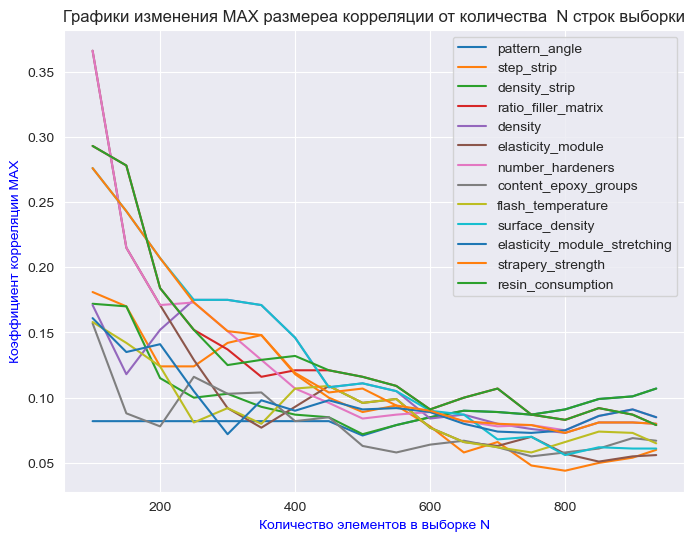

In [22]:
fig, axs = plt.subplots(1, 1, figsize=(8, 6))
axs.set_title('Графики изменения MAX размереа корреляции от количества  N строк выборки')
for index in range(len(df_corr_value)):
    x = df_corr_value.columns 
    y = df_corr_value.iloc[index]
    plt.plot( x, y, label= df_corr_value.index[index])
    plt.xlabel('Количество элементов в выборке N', fontsize=10, color='blue')
    plt.ylabel('Коэффициент корреляции МАХ', fontsize=10, color='blue')
    plt.legend()
    plt.grid(True)
    plt.savefig(r'save_fig\fig_block2_corr\graph_corr_N_row_joint.png', dpi=100) # Сохраняем рисунок таблицы в папку save_fig     

In [ ]:
# Рассмотрим более внимательно каждый график отдельно

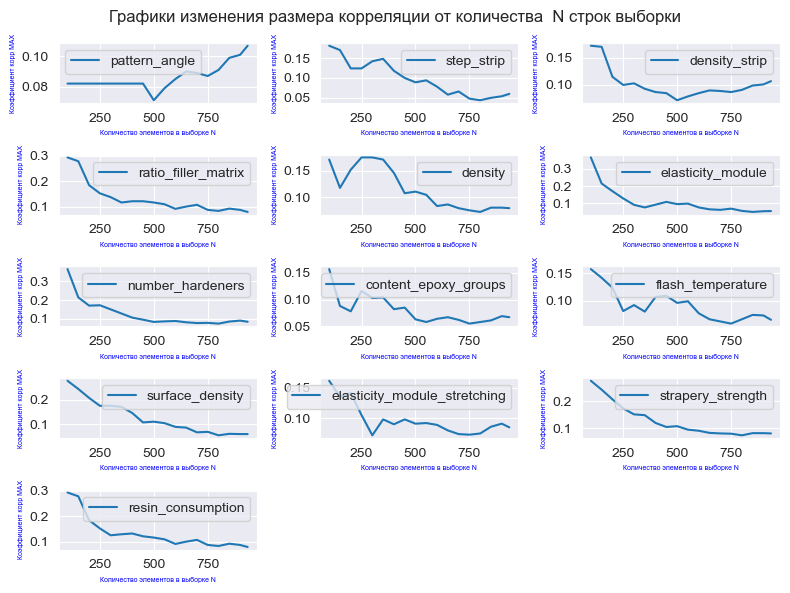

In [51]:
plt.figure(figsize = (8,6))
plt.suptitle('Графики изменения размера корреляции от количества  N строк выборки') 
a = 5 # количество строк
b = 3 # количество столцбцов
c = 1 # инициализация plot counter
for index in range(len(df_corr_value)):
    plt.subplot(a, b, c)
    plt.savefig(r'save_fig\fig_block2_corr\graph_corr_each_param_N_row.png', dpi=100)
    x = df_corr_value.columns 
    y = df_corr_value.iloc[index]
    plt.plot( x, y, label= df_corr_value.index[index])
   
    plt.xlabel('Количество элементов в выборке N', fontsize=5, color='blue')
    plt.ylabel('Коэффициент корр МАХ', fontsize=5, color='blue')
    plt.legend()
    plt.grid(True)
    #plt.title(index, size = 10)
    plt.tight_layout() # название осей не будут наезжать на соседние графики
    c = c + 1   

Максимальный коэффициент корреляции  при N= 100 каждого параметра ПАДАЕТ при увеличении количества элементов в выборке df.head(N)

В соответствии с теорией хрупкого разрушения (теория Гриффита) прочность (σр) определяется удельной энергией (α)
вновь образованной поверхности разрушения: (σр) = f( α * Е) где Е – модуль упругости материала
т.е. (σр) это 'Прочность при растяжении' - 'strapery_strength' (размерность в Мпа),  
а E  это 'Модуль упругости при растяжении' - 'elasticity_module_stretching'(размерность в ГПа ,т.е в 1000 раз болье чем σр)
введем еще оди признак/столбец  ALFA- 'удельную энергию ' - 'energy density' (α) = σр / Е

In [25]:
# введем новый признак ALFA
df_Sig = data_main_clean.strapery_strength
df_E = data_main_clean.elasticity_module_stretching
df_add_col = (data_main_clean.assign(alfa = df_Sig /df_E))

In [26]:
df_add_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   pattern_angle                 935 non-null    int32  
 1   step_strip                    935 non-null    float32
 2   density_strip                 935 non-null    float32
 3   ratio_filler_matrix           935 non-null    float32
 4   density                       935 non-null    float32
 5   elasticity_module             935 non-null    float32
 6   number_hardeners              935 non-null    float32
 7   content_epoxy_groups          935 non-null    float32
 8   flash_temperature             935 non-null    float32
 9   surface_density               935 non-null    float32
 10  elasticity_module_stretching  935 non-null    float32
 11  strapery_strength             935 non-null    float32
 12  resin_consumption             935 non-null    float32
 13  alfa 

In [27]:
# Максимальные корреляции в нащем df для ПЕРВЫХ  100  строк (pattern_angle = 0)

print(df_add_col.head(100).corr().abs().apply(lambda x: sorted(x)[-2]))

pattern_angle                        NaN
step_strip                      0.181442
density_strip                   0.171892
ratio_filler_matrix             0.293409
density                         0.170690
elasticity_module               0.365598
number_hardeners                0.365598
content_epoxy_groups            0.157392
flash_temperature               0.158004
surface_density                 0.284664
elasticity_module_stretching    0.275874
strapery_strength               0.977712
resin_consumption               0.293409
alfa                            0.977712
dtype: float64


Максимум корреляции у нас наблюдается между параметром  'elasticity_module'  и  'number_hardeners'
corr = 0.365 при выборке ПЕРВЫХ N =100
Не рассмтриваем корреляцию по ALFA, так как это зависипый параметр

In [30]:
# Максимальные корреляции в нащем df для СЛУЧАЙНЫХ 200  строк 
print(df_add_col.sample(n=200, random_state=42).corr().abs().apply(lambda x: sorted(x)[-2]))

pattern_angle                   0.148352
step_strip                      0.098215
density_strip                   0.148352
ratio_filler_matrix             0.223873
density                         0.092884
elasticity_module               0.153614
number_hardeners                0.080614
content_epoxy_groups            0.132030
flash_temperature               0.097019
surface_density                 0.153614
elasticity_module_stretching    0.190468
strapery_strength               0.971485
resin_consumption               0.223873
alfa                            0.971485
dtype: float64


In [ ]:
# Корреляция с увеличением выборки падает

In [ ]:
# Гипотеза
# Возьмем для исследования на различные виды регрессии массив из  DF df_add_col 
#  с новым параметром ALFA  200 СЛУЧАЙНЫХ (random_state=42) строк
#  в качестве массива TRAIN - df_Train_lineReg, чтобы была хотя бы небольшая видимая корреляция междупараметрами
# И возьмем для массива TEST -df_Test_lineReg 100 СЛУЧАЙНЫХ (random_state=50)  строк.

In [32]:
df_Train_lineReg = df_add_col.sample(n=200, random_state=42)

In [33]:
df_Train_lineReg

pattern_angle  step_strip  density_strip  ratio_filler_matrix  \
321              0    3.449057      54.426636             2.533666   
70               0    4.378306      84.132782             3.833405   
209              0    2.867729      55.480389             2.404250   
549              1    7.073134      52.399574             2.547746   
712              1    7.893335      55.038357             3.750616   
..             ...         ...            ...                  ...   
755              1    9.083087      51.911682             4.672823   
235              0    8.719121      43.306179             2.173815   
807              1    4.976887      67.110069             0.927841   
895              1    7.812506      62.702042             1.765107   
896              1    4.843832      40.734360             3.618794   

         density  elasticity_module  number_hardeners  content_epoxy_groups  \
321  1949.062866        1013.706482        138.336594             24.131506   
70   1921.917603        1343.600830        126.919151             21.245371   
209  2021.893311         800.133301        115.274101             21.114441   
549  1980.854980         728.348267        112.169655             23.021587   
712  1973.599731         900.503967        111.770752             20.969633   
..           ...                ...               ...                   ...   
755  1930.569580        1051.685425        108.693314             26.798607   
235  1977.302979         495.742462        133.221863             23.275623   
807  1952.857422         304.058319        105.938446             24.791859   
895  2116.800537         850.754150        108.868965             25.160542   
896  1995.502319          97.733727         80.330849             24.635630   

     flash_temperature  surface_density  elasticity_module_stretching  \
321         275.093842       160.513245                     73.726395   
70          303.842926        49.975761                     70.678688   
209         304.761322       742.737549                     68.951416   
549         307.818634      1133.447998                     73.689995   
712         240.697632       318.841492                     74.943214   
..                 ...              ...                           ...   
755         273.017914       403.726624                     72.492836   
235         277.645386       239.456055                     69.420006   
807         318.140533       386.789246                     72.221527   
895         354.183167       727.081909                     76.445389   
896         346.526642       660.247925                     72.366219   

     strapery_strength  resin_consumption       alfa  
321        3259.581299         228.410492  44.211864  
70         3077.869385         208.929443  43.547348  
209        2981.844727         190.346771  43.245590  
549        2859.464844         162.772507  38.803978  
712        2733.931641         245.741333  36.480042  
..                 ...                ...        ...  
755        2649.360352         265.270508  36.546513  
235        2971.013672         279.281769  42.797657  
807        2640.187012          84.490128  36.556786  
895        2441.189941         201.081696  31.933777  
896        2618.950684         253.199448  36.190239  

[200 rows x 14 columns]

In [34]:
df_Train_lineReg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 321 to 896
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   pattern_angle                 200 non-null    int32  
 1   step_strip                    200 non-null    float32
 2   density_strip                 200 non-null    float32
 3   ratio_filler_matrix           200 non-null    float32
 4   density                       200 non-null    float32
 5   elasticity_module             200 non-null    float32
 6   number_hardeners              200 non-null    float32
 7   content_epoxy_groups          200 non-null    float32
 8   flash_temperature             200 non-null    float32
 9   surface_density               200 non-null    float32
 10  elasticity_module_stretching  200 non-null    float32
 11  strapery_strength             200 non-null    float32
 12  resin_consumption             200 non-null    float32
 13  alf

In [35]:
df_Train_lineReg.sort_index(ascending=True, inplace= True) # Сортируем по возрастанию индексы

In [36]:
df_Train_lineReg

pattern_angle  step_strip  density_strip  ratio_filler_matrix  \
2                0    7.526398      38.176975             1.856476   
5                0   10.302945      39.234280             2.282825   
23               0    6.191330      31.804142             1.298167   
30               0    7.421704      58.238503             3.631935   
31               0    4.545925      63.325703             3.950352   
..             ...         ...            ...                  ...   
920              1    7.607928      79.842926             3.748962   
924              1   10.316797      79.079544             3.991003   
929              1    6.711364      54.059441             2.758728   
930              1    8.088111      47.759178             2.271346   
933              1   10.079859      65.519478             3.705351   

         density  elasticity_module  number_hardeners  content_epoxy_groups  \
2    2018.220337         836.294373        135.401703             26.435514   
5    2008.357544         393.967316        149.372833             21.661751   
23   1984.511353        1405.786865        130.942795             21.829241   
30   2065.517822         553.620911        120.695877             24.431894   
31   2078.085205         578.472229        101.985374             23.521570   
..           ...                ...               ...                   ...   
920  2009.440918         245.556412        124.510078             20.164885   
924  1965.986694         818.633789         98.518837             18.614239   
929  2000.506104         934.564392        143.021866             21.379519   
930  1952.087891         912.855530         86.992180             20.123249   
933  2066.799805         741.475525        141.397964             19.246944   

     flash_temperature  surface_density  elasticity_module_stretching  \
2           327.510376       150.961441                     77.210762   
5           330.498627       535.371460                     72.244926   
23          288.952087       161.007721                     74.680916   
30          308.978577       234.161667                     69.802193   
31          263.936798       200.970963                     75.929428   
..                 ...              ...                           ...   
920         283.765778       255.296265                     69.831299   
924         302.676819       135.182388                     75.259888   
929         273.852692        65.105965                     67.633751   
930         324.774567       209.198700                     73.090958   
933         275.779846       641.468140                     74.042709   

     strapery_strength  resin_consumption       alfa  
2          2473.187256         123.344559  32.031639  
5          2704.445068         261.077057  37.434395  
23         2526.814209         228.867722  33.834805  
30         2320.818604         266.138306  33.248505  
31         2684.394043         321.583191  35.353802  
..                 ...                ...        ...  
920        2588.875488         224.716095  37.073284  
924        2099.783936         259.848389  27.900440  
929        3102.539551         229.780365  45.872654  
930        2387.292480         125.007668  32.661942  
933        2071.715820         197.126068  27.980011  

[200 rows x 14 columns]

In [37]:
# Подготовим массив для TEST для наших исследованй Регрессии. 
# Выберем 100 СЛУЧАЙНЫХ строк из нашего массива df_add_col при (random_state=50) 

df_Test_lineReg = df_add_col.sample(n=100, random_state=50)

In [38]:
df_Test_lineReg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 19 to 32
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   pattern_angle                 100 non-null    int32  
 1   step_strip                    100 non-null    float32
 2   density_strip                 100 non-null    float32
 3   ratio_filler_matrix           100 non-null    float32
 4   density                       100 non-null    float32
 5   elasticity_module             100 non-null    float32
 6   number_hardeners              100 non-null    float32
 7   content_epoxy_groups          100 non-null    float32
 8   flash_temperature             100 non-null    float32
 9   surface_density               100 non-null    float32
 10  elasticity_module_stretching  100 non-null    float32
 11  strapery_strength             100 non-null    float32
 12  resin_consumption             100 non-null    float32
 13  alfa 

In [ ]:
# Рассмотрим другие типы графиков для исследования. 

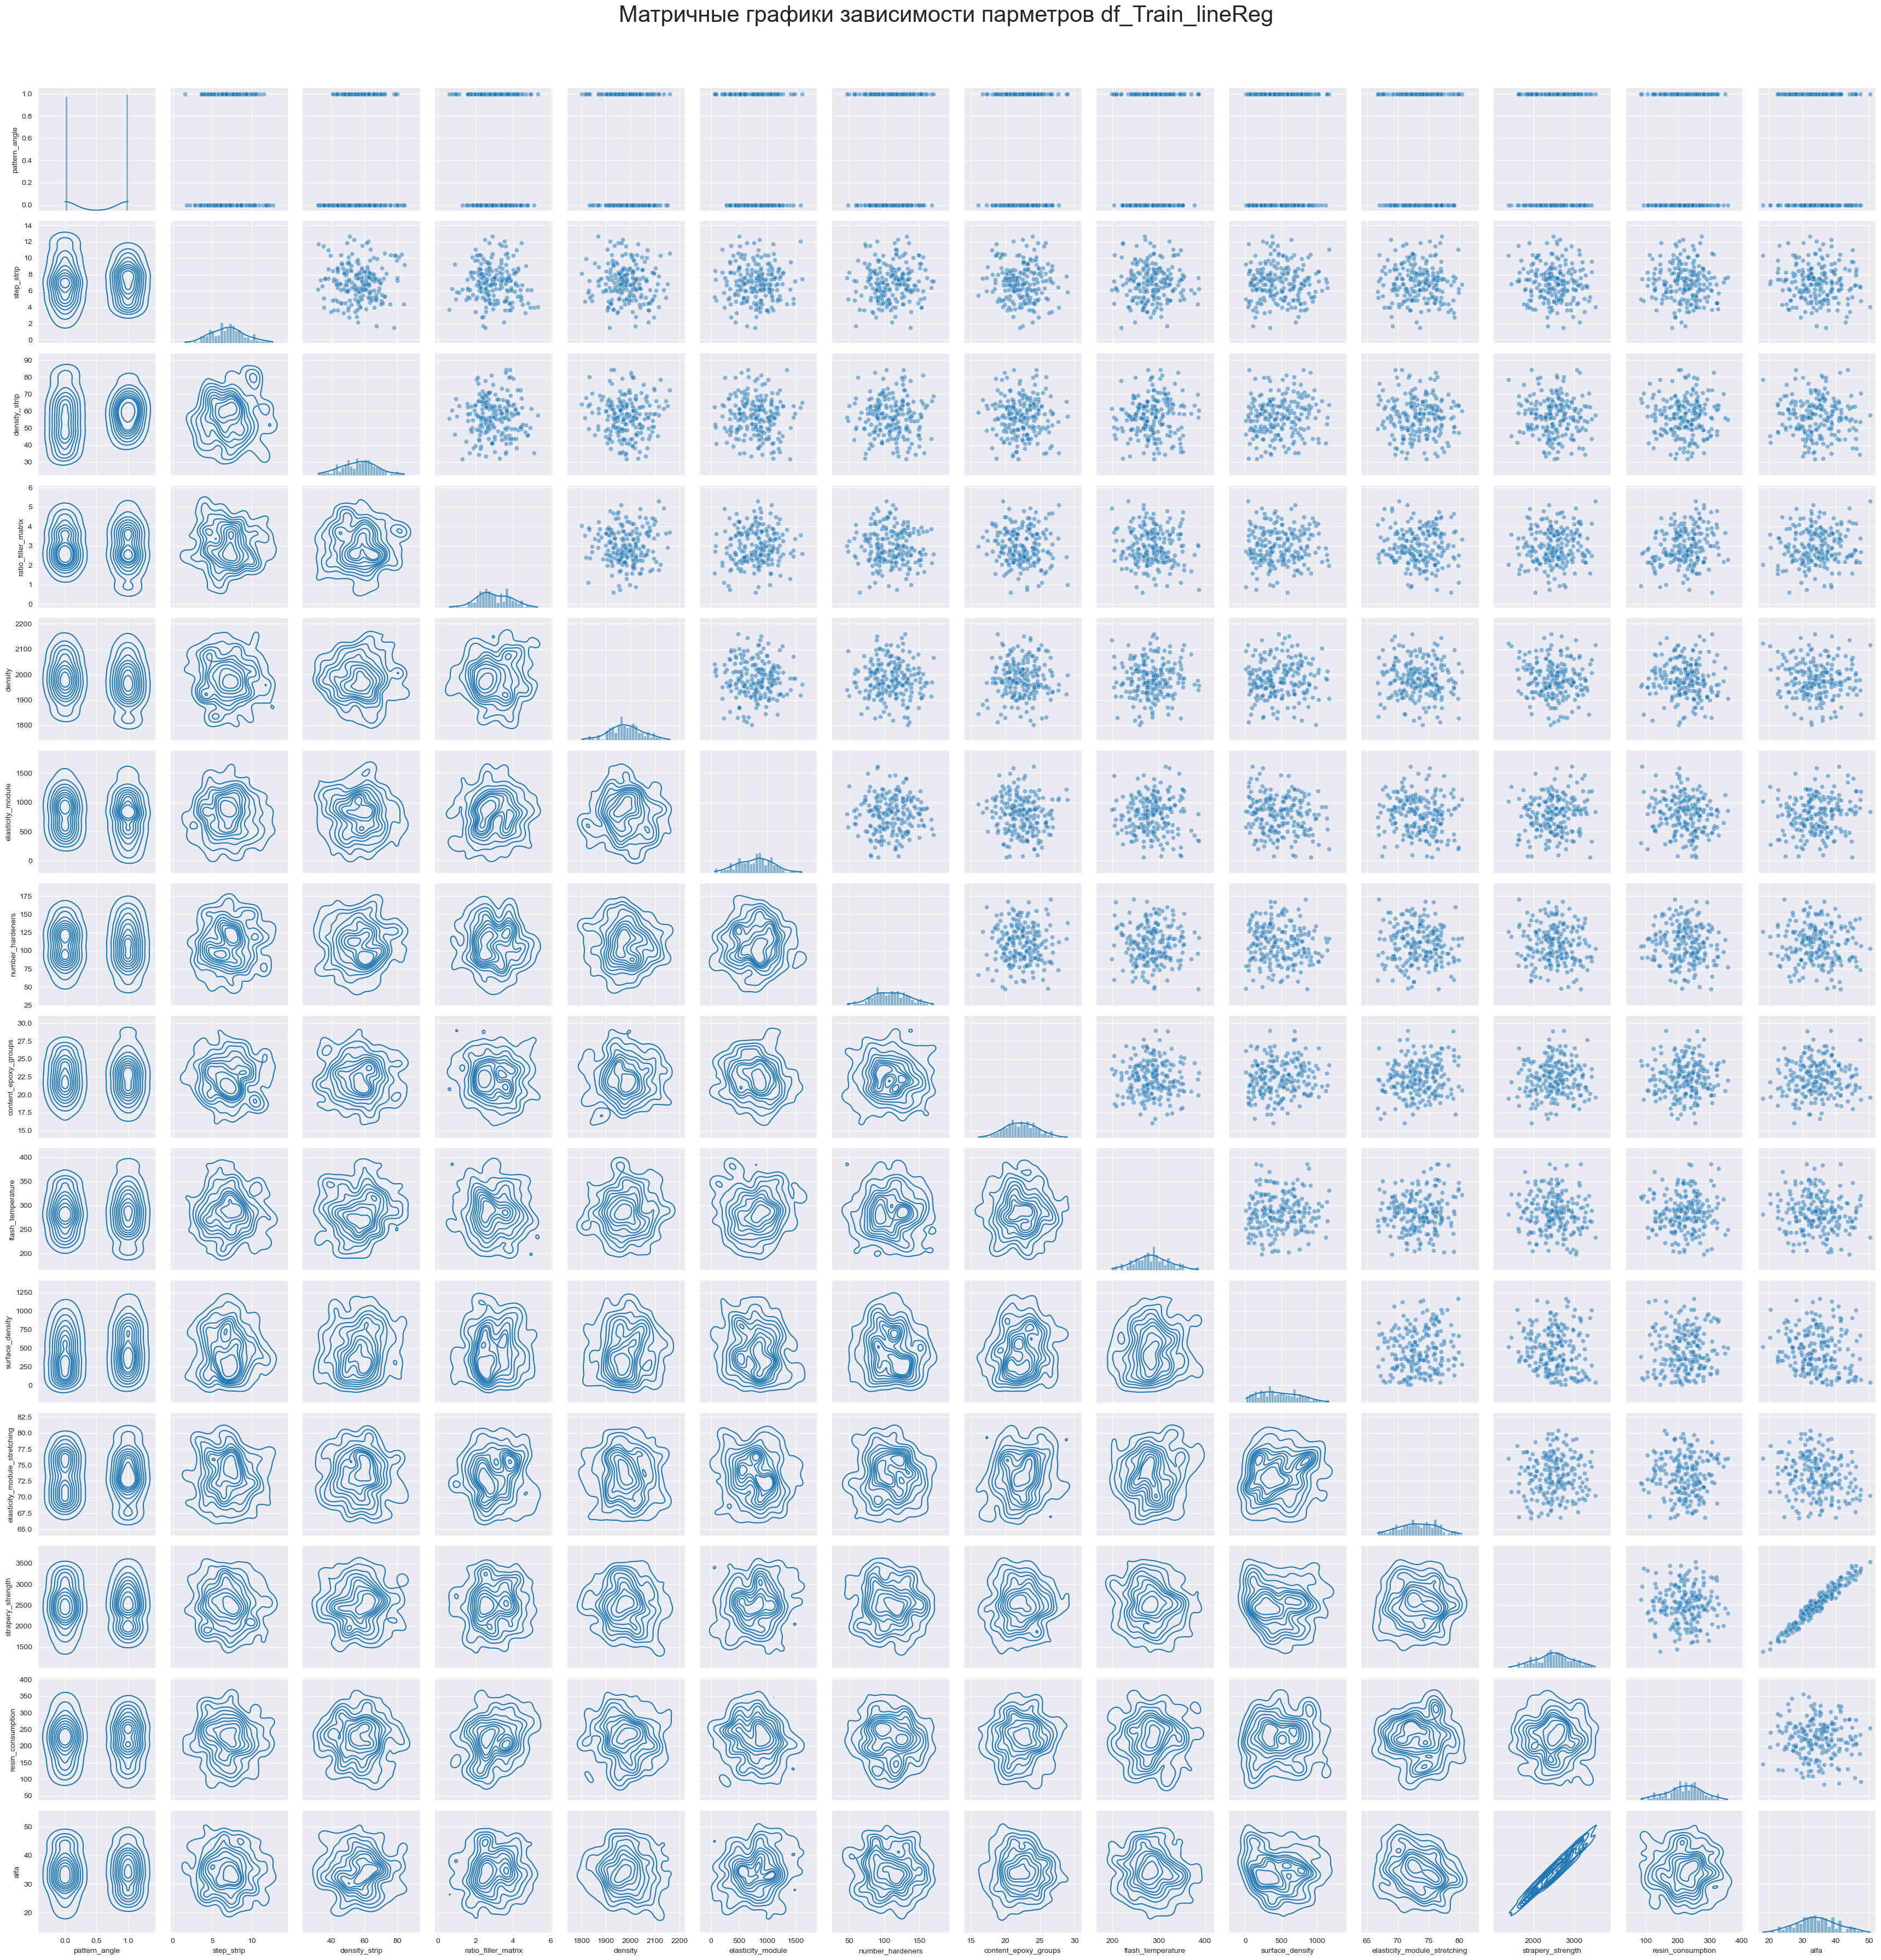

In [39]:
# Для df_Train_lineReg 
sns_plt_PairGrid(df_Train_lineReg, 'Матричные графики зависимости парметров df_Train_lineReg', 'None', 'None')
plt.savefig(r'save_fig\fig_block1_clean\graf_matrix_df_Train_lineReg.png', dpi=100)

In [ ]:
В задании к ВКР целевыми переменными заданы 'elasticity_module_stretching' и 'strapery_strength'
Проверим для каждой целевой переменной зависимости от параметров с выведением регрессионной прямой на графиках зависимости

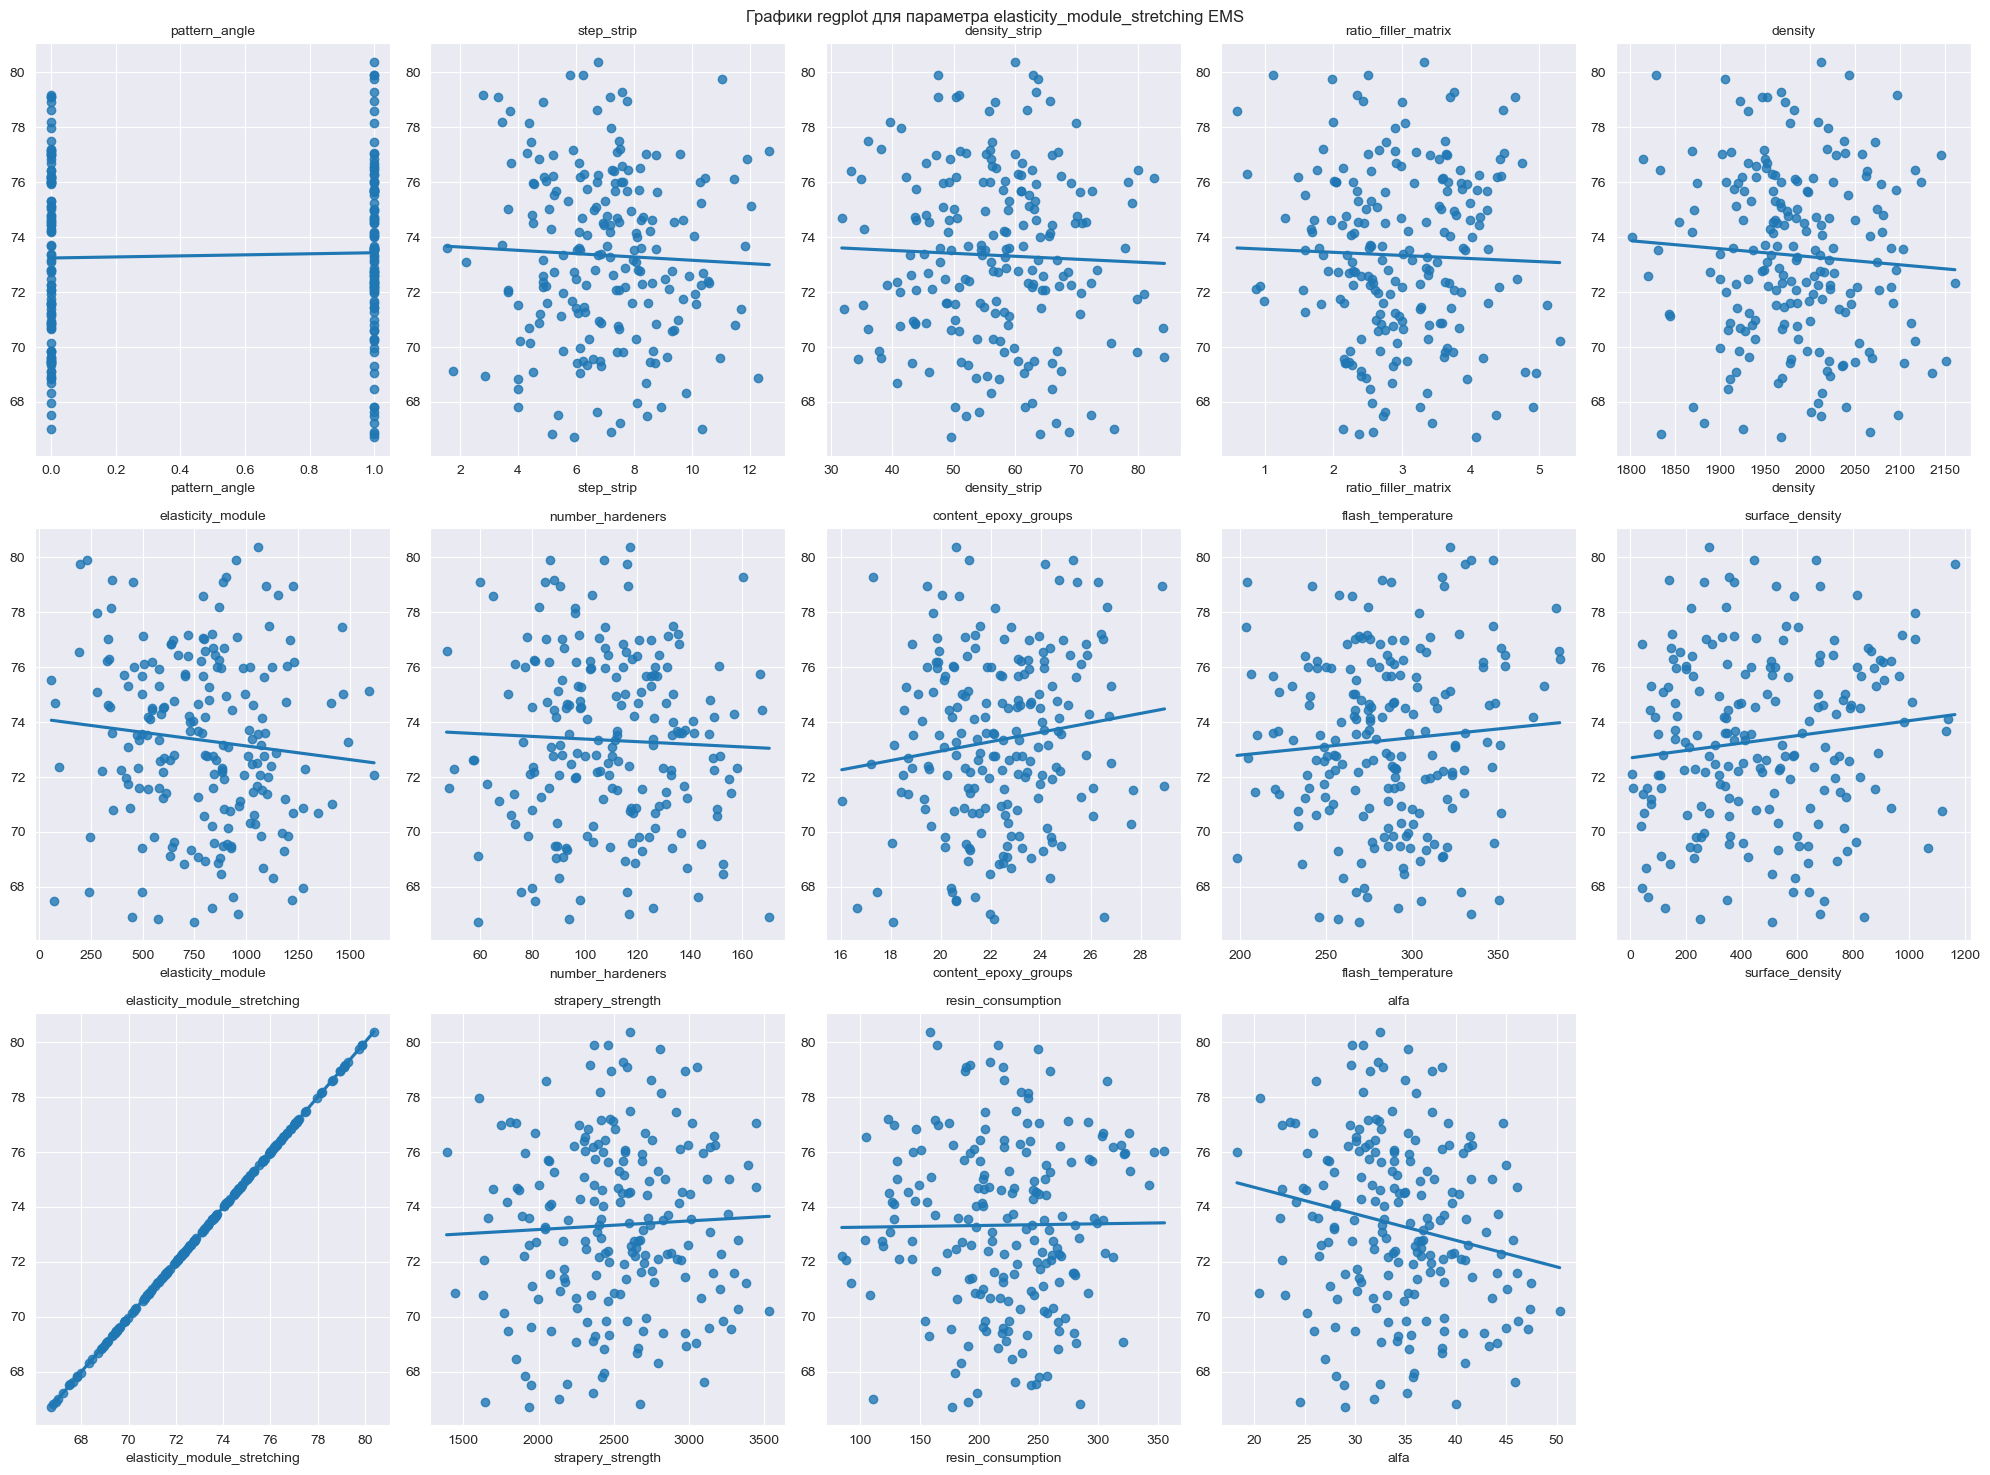

In [59]:
# Постороим графики "точечные графики" с линией регрессии regplot  Для 'elasticity_module_stretching'
drawing_graphs(df_Train_lineReg, 3, 5, 20, 15, name_Y='elasticity_module_stretching', 'regplot', 
               'Графики regplot для параметра elasticity_module_stretching EMS', 
               graf_name_path = r'save_fig\fig_block2_corr\graf_regplot_EMS.png')

In [ ]:
Как видно из графиков  между  целевой переменной 'elasticity_module_stretching' (EMS)
а) практически не наблюдается корреляция с параметрами:
'pattern_angle', 'step_strip', 'density_strip','ratio_filler_matrix','density', 'density', 'flash_temperature',
 'surface_density' и 'resin_consumption','number_hardeners','strapery_strength'
б) слабая корреляция наблюдается  с параметрами :
'elasticity_module', 'content_epoxy_groups',  'alfa' 

Вероятно, можно проводить регрессивный анализ по целевой переменной  'elasticity_module_stretching'с параметрами: 'elasticity_module',  'content_epoxy_groups',  'alfa' 

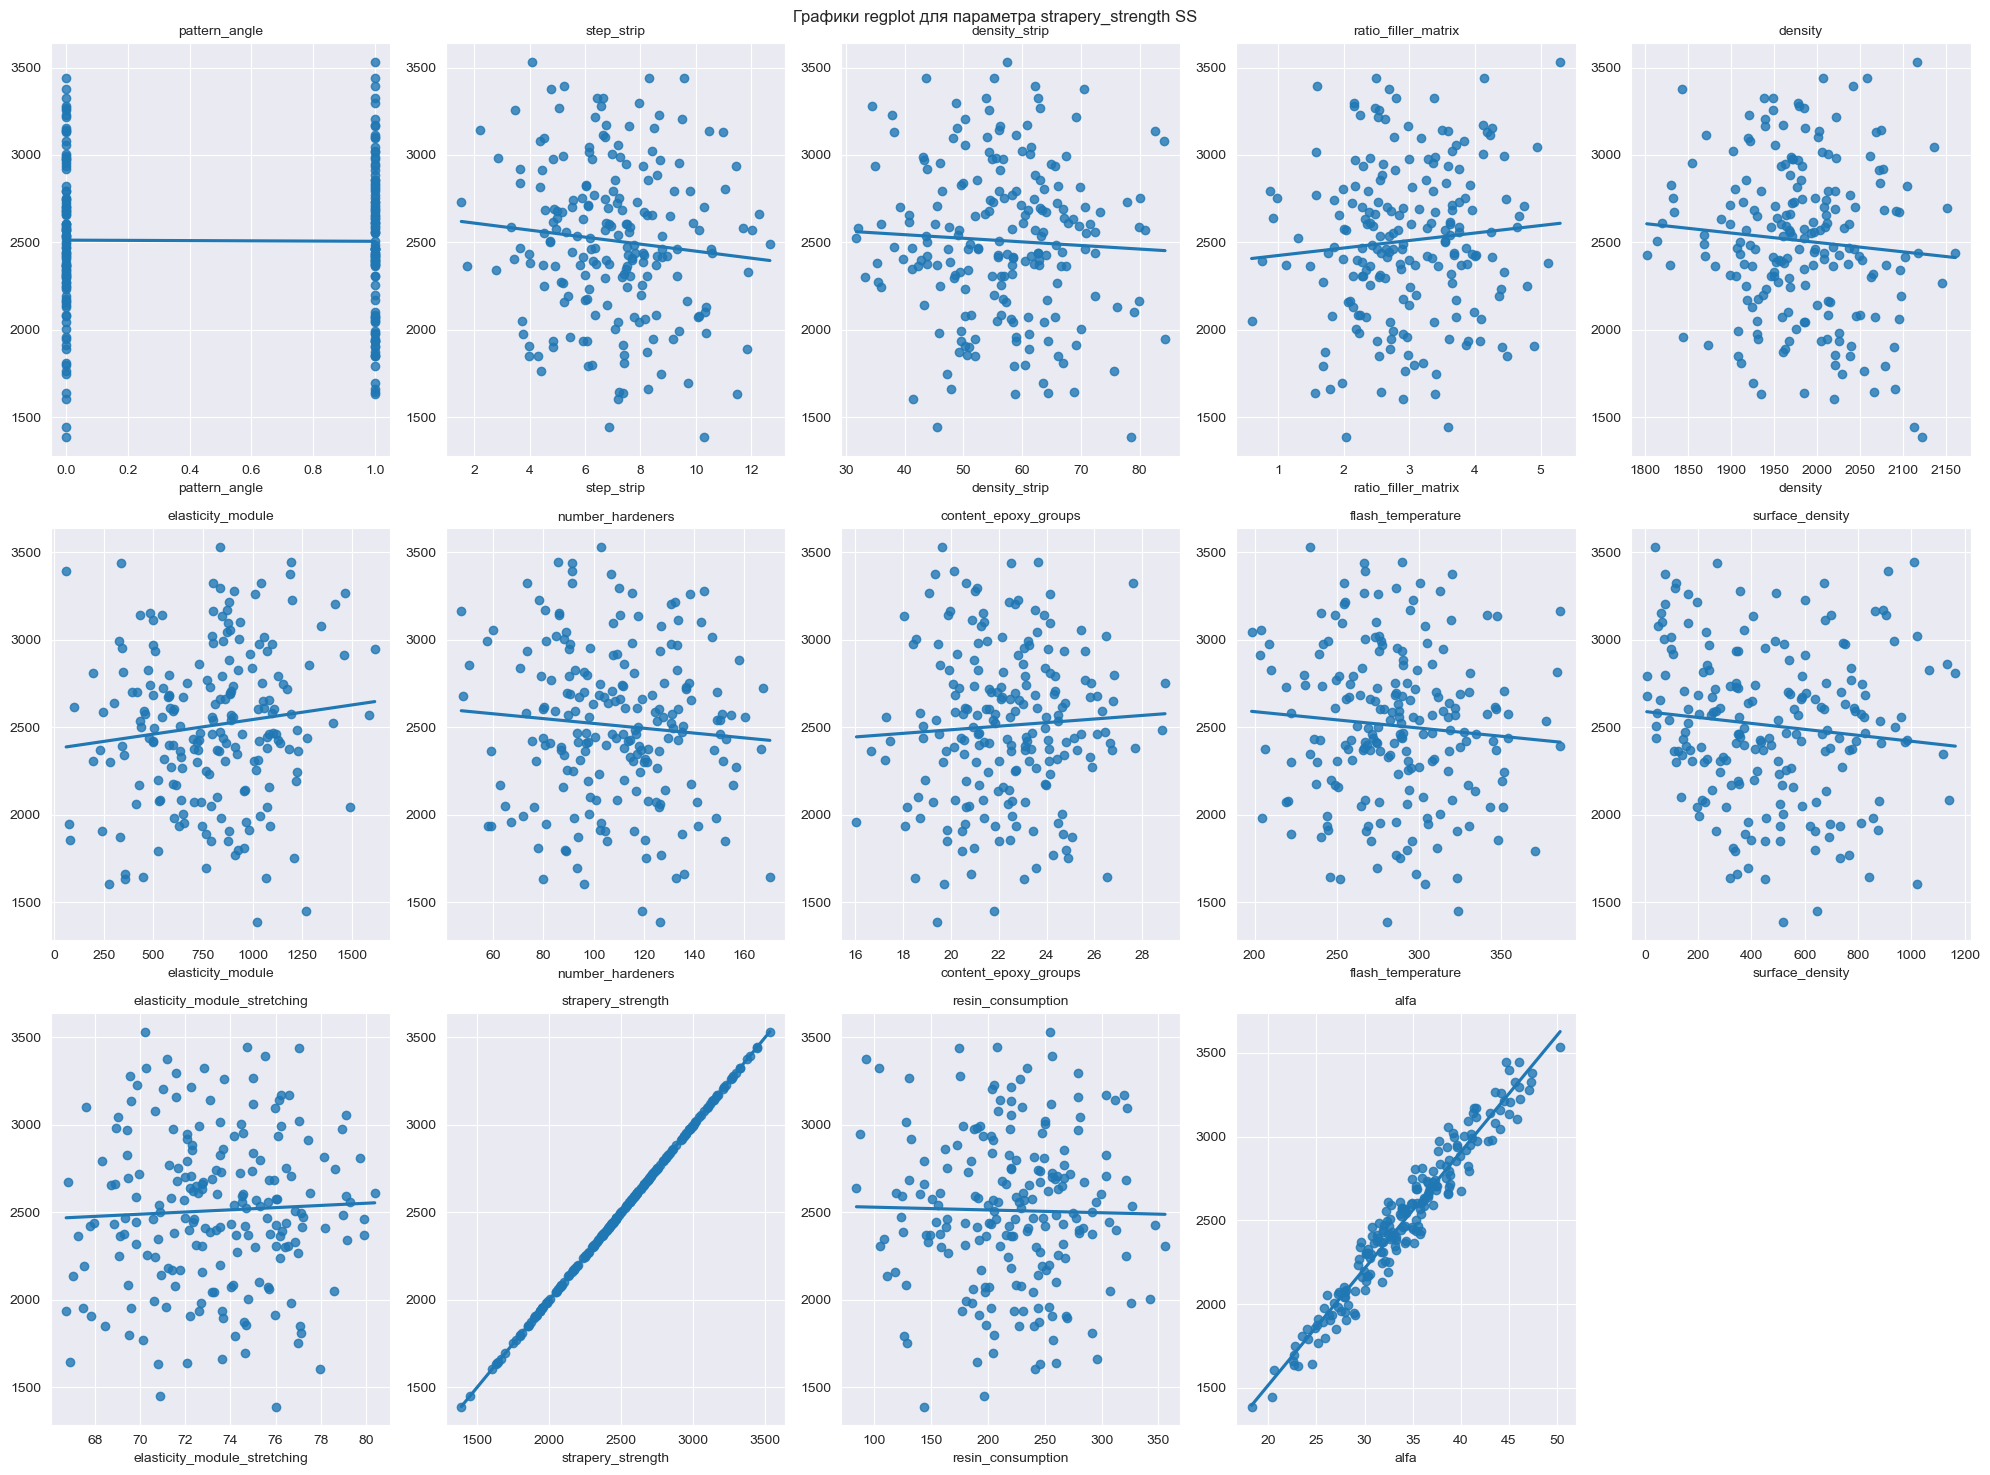

In [60]:
# Проведем такой же анализ для второй целевой переменной 'strapery_strength'
drawing_graphs(df_Train_lineReg, 3, 5, 20, 15, name_Y='strapery_strength', 'regplot', 
               'Графики regplot для параметра strapery_strength SS', 
               graf_name_path = r'save_fig\fig_block2_corr\graf_regplot_SS.png')

In [ ]:
Как видно из графиков для второй  целевой переменной 'strapery_strength'
а) практически не наблюдается корреляция с параметрами:
'pattern_angle', 'step_strip', 'density_strip',  'density'
 'content_epoxy_groups','number_hardeners' ,'flash_temperature', 'surface_density', 'resin_consumption','elasticity_module_stretching'
б) корреляция наблюдается  с параметрами :
'ratio_filler_matrix', 'elasticity_module', 'alfa'

Вероятно, можно проводить регрессивный анализ по целевой переменной  'strapery_strength'с параметрами: 
'ratio_filler_matrix', 'elasticity_module', 'alfa'

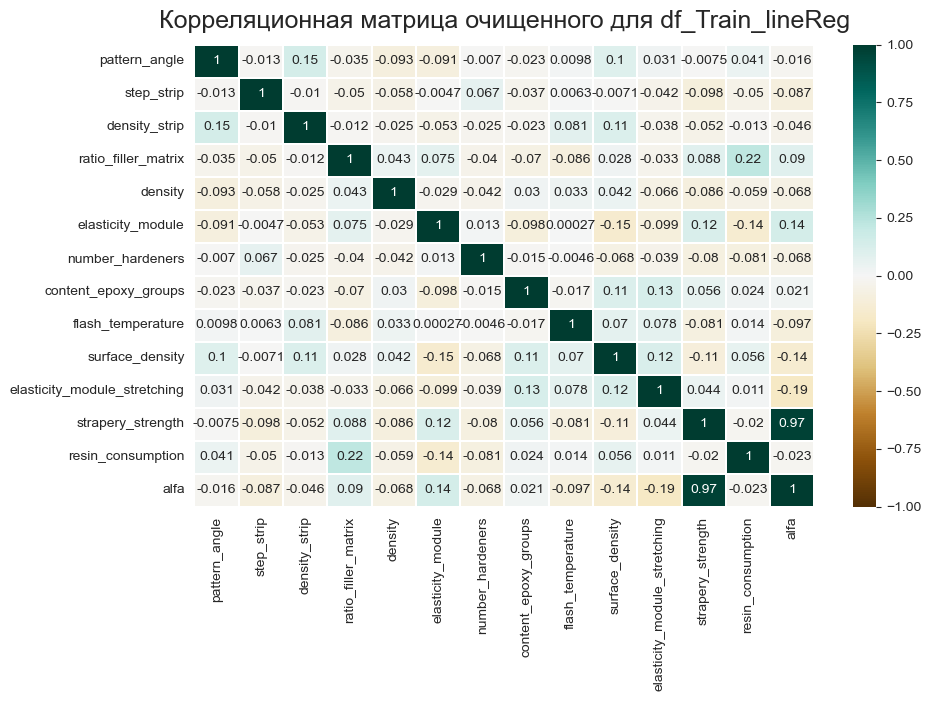

In [69]:
# Построим корреляционную матрицу data_main_clean с помощью функции plot_corr_heatmap
plot_corr_heatmap(df_Train_lineReg, 10,  6, 
                  'Корреляционная матрица очищенного для df_Train_lineReg', 
                  r'save_fig\fig_block2_corr\corr_heatmap_df_Train_lineReg.png'
                   )

# Выбор признаков (фич)

Вероятно, можно проводить регрессивный анализ по целевой переменной  'elasticity_module_stretching'
с параметрами: 'elasticity_module',  'content_epoxy_groups',  'alfa' 

Вероятно, можно проводить регрессивный анализ по целевой переменной  'strapery_strength'
с параметрами: 'ratio_filler_matrix', 'elasticity_module', 'alfa'

In [ ]:
# Запишем 2 файла- массив df_Train_lineReg (из 200 СЛУЧАЙНЫХ строк массива df_add_col )
# и df_Test_lineReg (из 100 СЛУЧАЙНЫХ строк массива df_add_col)
# для изучения в Блоке 3 практического изучения регрессий

In [62]:
df_Train_lineReg.to_csv(r'data_storage\data_block2_corr\data_Train_ML.csv', index=False)

In [64]:
df_Test_lineReg.to_csv(r'data_storage\data_block2_corr\data_Test_ML.csv', index=False)

In [ ]:
В следующей части нашей работы мы попробуем провести анализ реграссии применительно к нашему набору данных

In [ ]:
# Конец Блока 2 исследование корреляции и создание 2-х df data_Train_ML на 200 строк и data_Test_ML на 100 строк